# EDA - Redfin Data

In [1]:
#load modules
import pandas as pd
import numpy as np
#%matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from ipywidgets import widgets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load data
df_clean = pd.read_csv('../data/interim/redfin_data_cleaned.csv', index_col=0)
df_clean.head()

,address,city,zipcode,price,beds,baths,square_feet,lot_size,year_built,days_on_market,price_per_sqft,hoa_per_mon,latitude,longitude,property_type,propertytype_singlefamily
0,9329 Sienna Vista Dr,Las Vegas,89117,621500,4.0,2.50,2352.0,6098.0,1994.0,19.0,264.0,146.0,36.154483,-115.297871,SingleFamily,1
1,3358 Wardlaw St,Las Vegas,89117,400000,4.0,3.00,1883.0,3920.0,1995.0,44.0,212.0,67.0,36.128126,-115.263408,SingleFamily,1
2,3367 Ceremony Dr,Las Vegas,89117,339000,4.0,2.50,2230.0,4356.0,1995.0,44.0,152.0,67.0,36.127931,-115.263037,SingleFamily,1
3,1680 City View Ct,Las Vegas,89117,818000,4.0,5.00,4863.0,20038.0,1993.0,44.0,168.0,67.0,36.151716,-115.268710,SingleFamily,1
4,972 Prestwick St,Las Vegas,89145,335000,3.0,2.75,1613.0,2614.0,2001.0,39.0,208.0,175.0,36.160917,-115.294868,Condo/Townhouse,0


In [3]:
# exploring individual variables using pandas profiling
profile = ProfileReport(df_clean, title='Pandas Profiling Report')

In [4]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

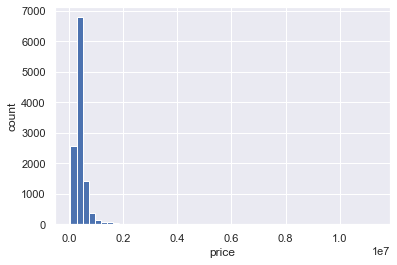

In [5]:
#check out dependent variable (price)
sns.set()
_ = plt.hist(df_clean['price'], bins=50)
_ = plt.xlabel('price')
_ = plt.ylabel('count')
plt.show()

In [6]:
df_clean['price'].describe()

count    1.160600e+04
mean     4.248243e+05
std      3.963848e+05
min      4.500000e+04
25%      2.800000e+05
50%      3.450000e+05
75%      4.475000e+05
max      1.130000e+07
Name: price, dtype: float64

In [7]:
#checking outliers in 'price'
df_clean[df_clean['price'] > 5000000]

,address,city,zipcode,price,beds,baths,square_feet,lot_size,year_built,days_on_market,price_per_sqft,hoa_per_mon,latitude,longitude,property_type,propertytype_singlefamily
248,9511 Kings Gate Ct,Las Vegas,89145,7500000,10.0,10.50,20120.0,82764.0,2003.0,45.0,373.0,598.0,36.163673,-115.304038,SingleFamily,1
154,587 Saint Croix St,Henderson,89012,6488800,7.0,10.75,13706.0,33106.0,2008.0,9.0,473.0,330.0,36.009276,-115.040761,SingleFamily,1
187,19 Sanctuary Peak Ct,Henderson,89012,6300000,4.0,4.75,8911.0,58370.0,2018.0,56.0,707.0,650.0,35.992892,-115.064193,SingleFamily,1
246,2787 La Bella Ct,Henderson,89052,5200000,5.0,6.25,8659.0,34412.0,2020.0,16.0,601.0,180.0,35.983654,-115.109683,SingleFamily,1
275,1701 Enclave Ct,Las Vegas,89134,9600000,4.0,6.50,13349.0,84506.0,1997.0,21.0,719.0,1275.0,36.190295,-115.295890,SingleFamily,1
294,1641 Enclave Court Ct,Las Vegas,89134,11300000,6.0,8.25,14132.0,113256.0,1999.0,7.0,800.0,1275.0,36.189567,-115.296121,SingleFamily,1
42,15 Hawk Ridge Dr,Las Vegas,89135,6800000,5.0,6.50,10194.0,26136.0,2009.0,11.0,667.0,345.0,36.118033,-115.340289,SingleFamily,1
85,19 Flying Cloud Ln,Las Vegas,89135,7900000,5.0,7.00,12445.0,38768.0,2013.0,35.0,635.0,67.0,36.108766,-115.350011,SingleFamily,1
96,8 Sun Glow Ln,Las Vegas,89135,5335000,6.0,6.50,7167.0,15246.0,2019.0,8.0,744.0,505.0,36.110126,-115.341741,SingleFamily,1
98,29 Promontory Ridge Dr,Las Vegas,89135,5600000,6.0,6.75,11918.0,20909.0,2007.0,23.0,470.0,560.0,36.125481,-115.344270,SingleFamily,1


<AxesSubplot:xlabel='price'>

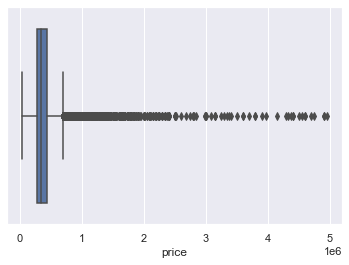

In [8]:
#I'm going to drop these properties. I'm afraid that having these outliers in my dependent variable is going to decrease the accuracy of my model
df_clean = df_clean.loc[df_clean['price'] < 5000000]

sns.boxplot(x='price', data=df_clean)

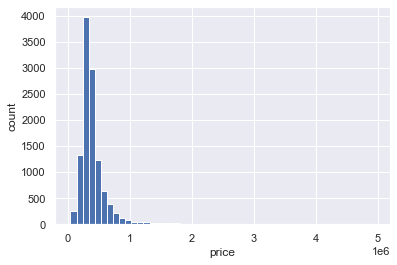

In [9]:
#check out dependent variable (price) after removing outliers
sns.set()
_ = plt.hist(df_clean['price'], bins=50)
_ = plt.xlabel('price')
_ = plt.ylabel('count')
plt.show()

In [10]:
df_clean['price'].describe()

count    1.159300e+04
mean     4.173628e+05
std      3.228064e+05
min      4.500000e+04
25%      2.800000e+05
50%      3.450000e+05
75%      4.459980e+05
max      4.950000e+06
Name: price, dtype: float64

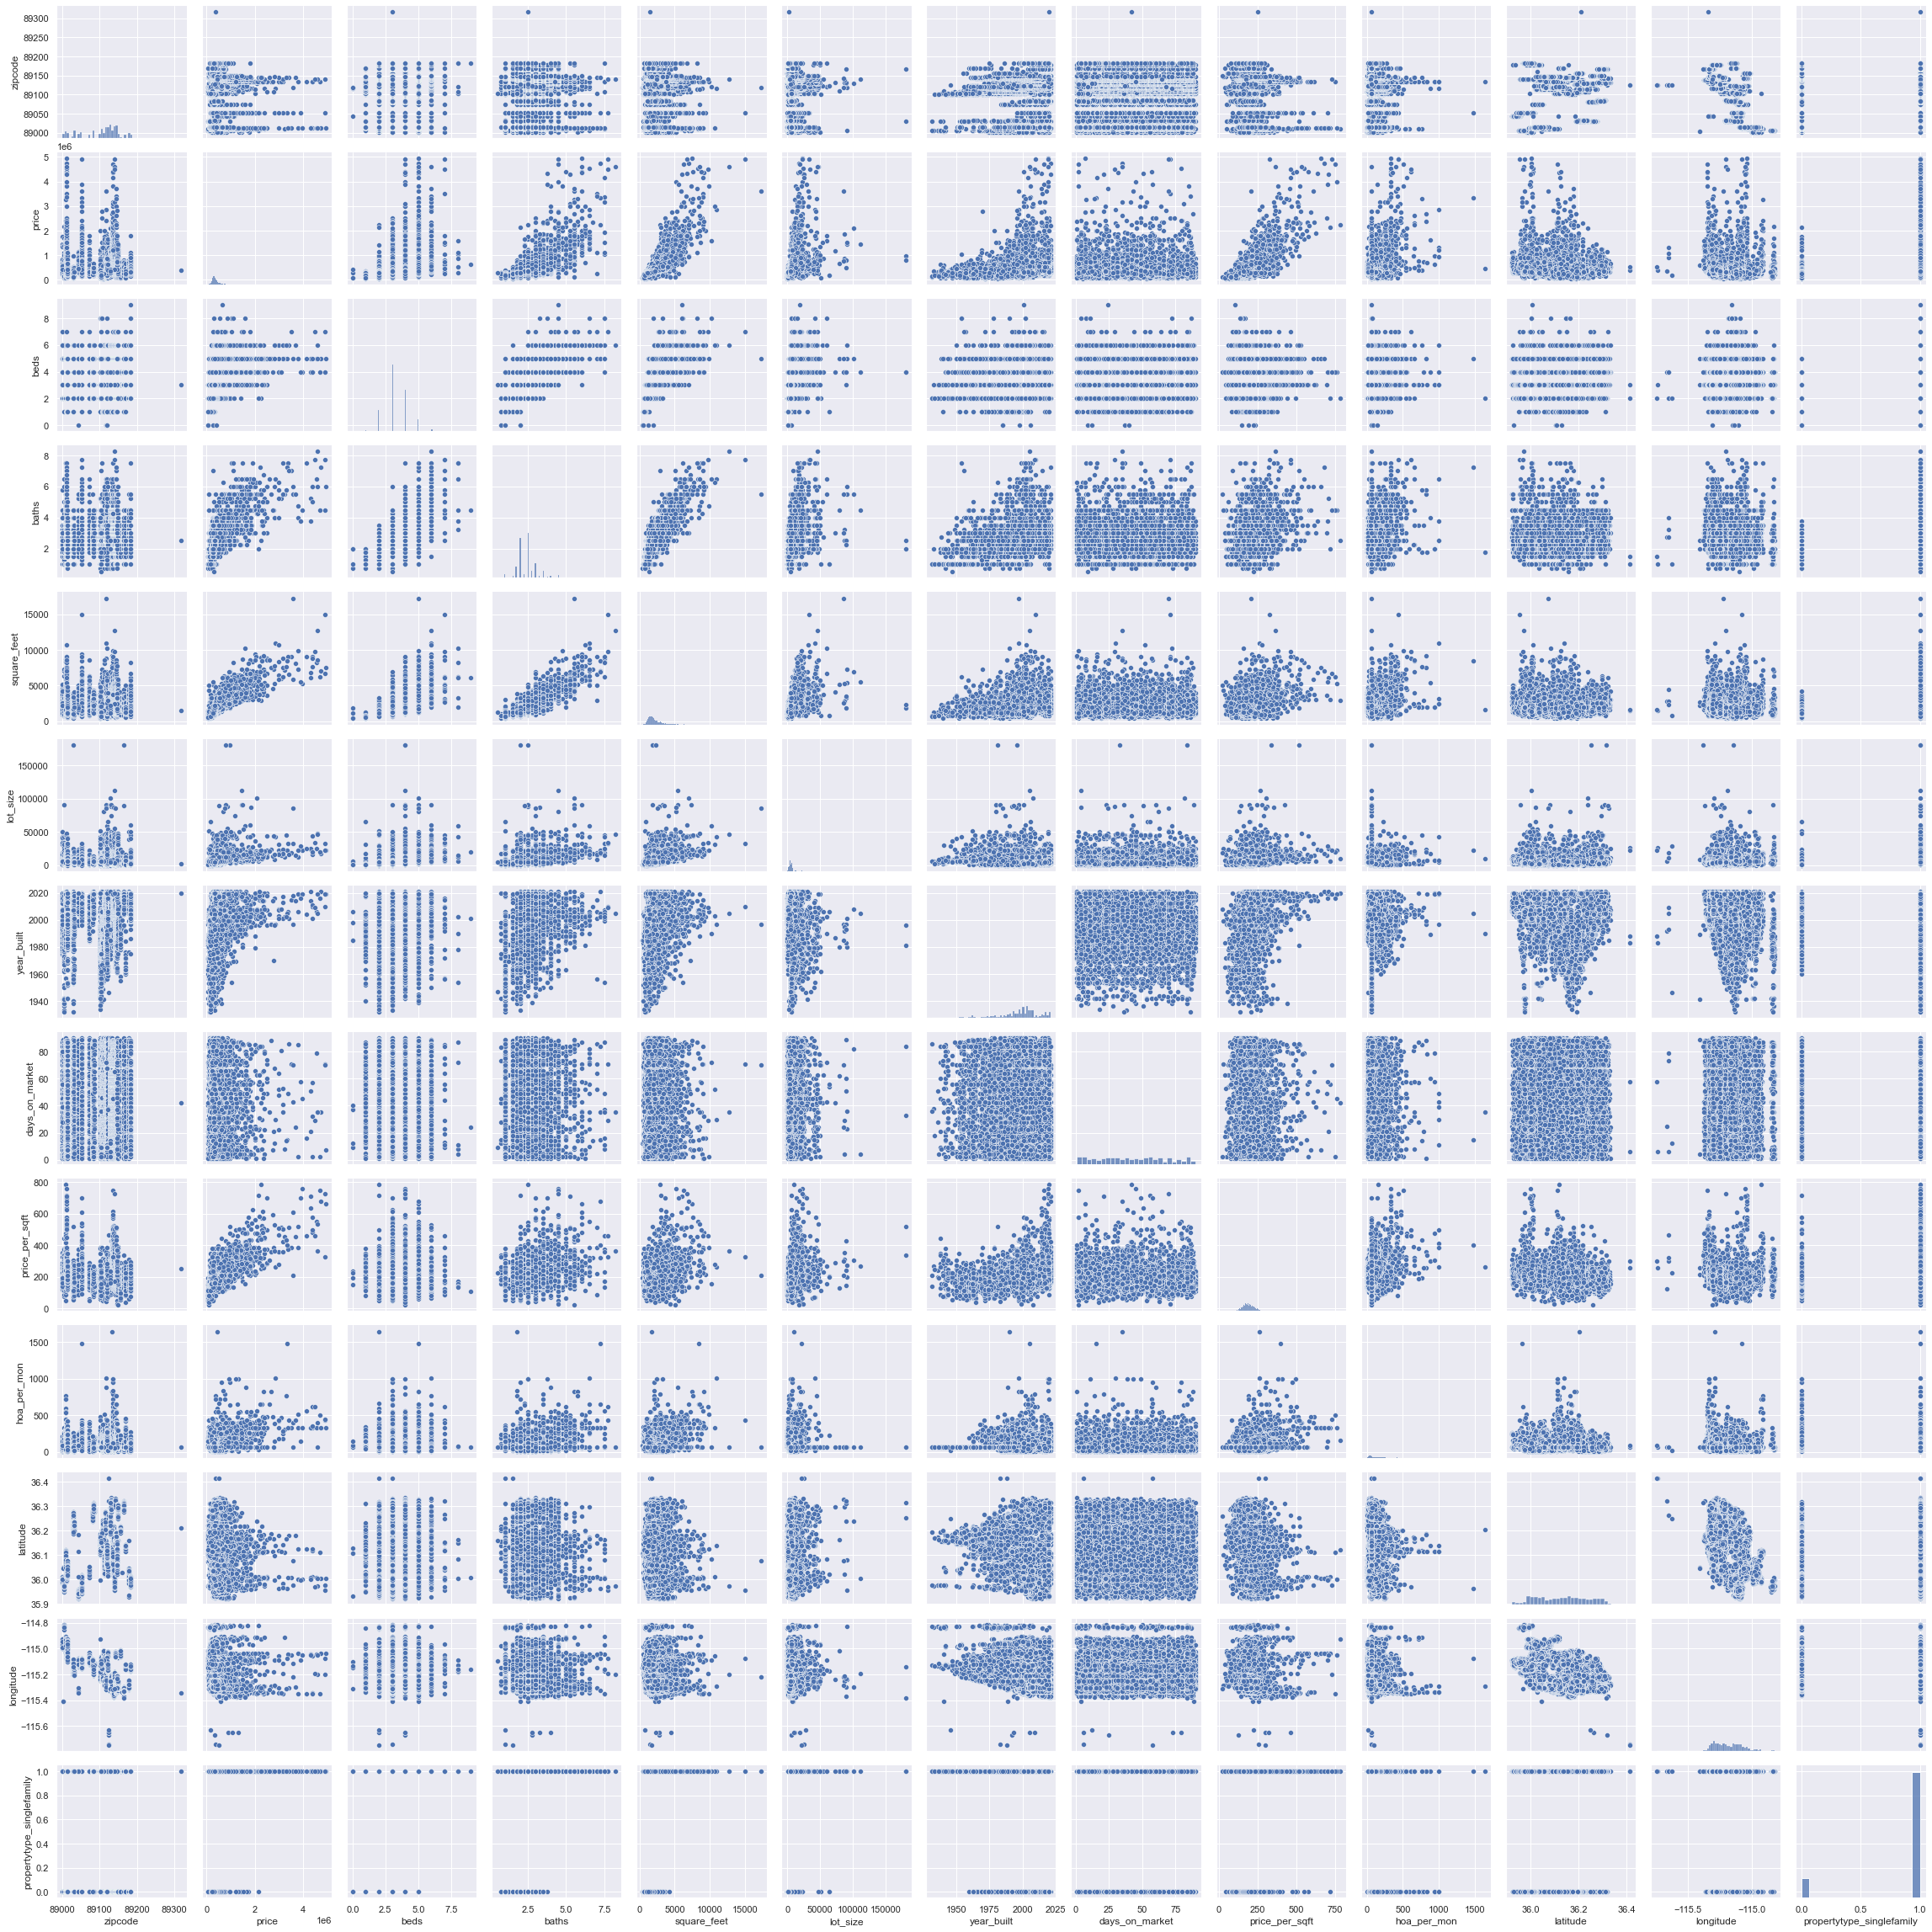

In [11]:
# visualizing relationships between variables
sns.pairplot(df_clean)
plt.show()

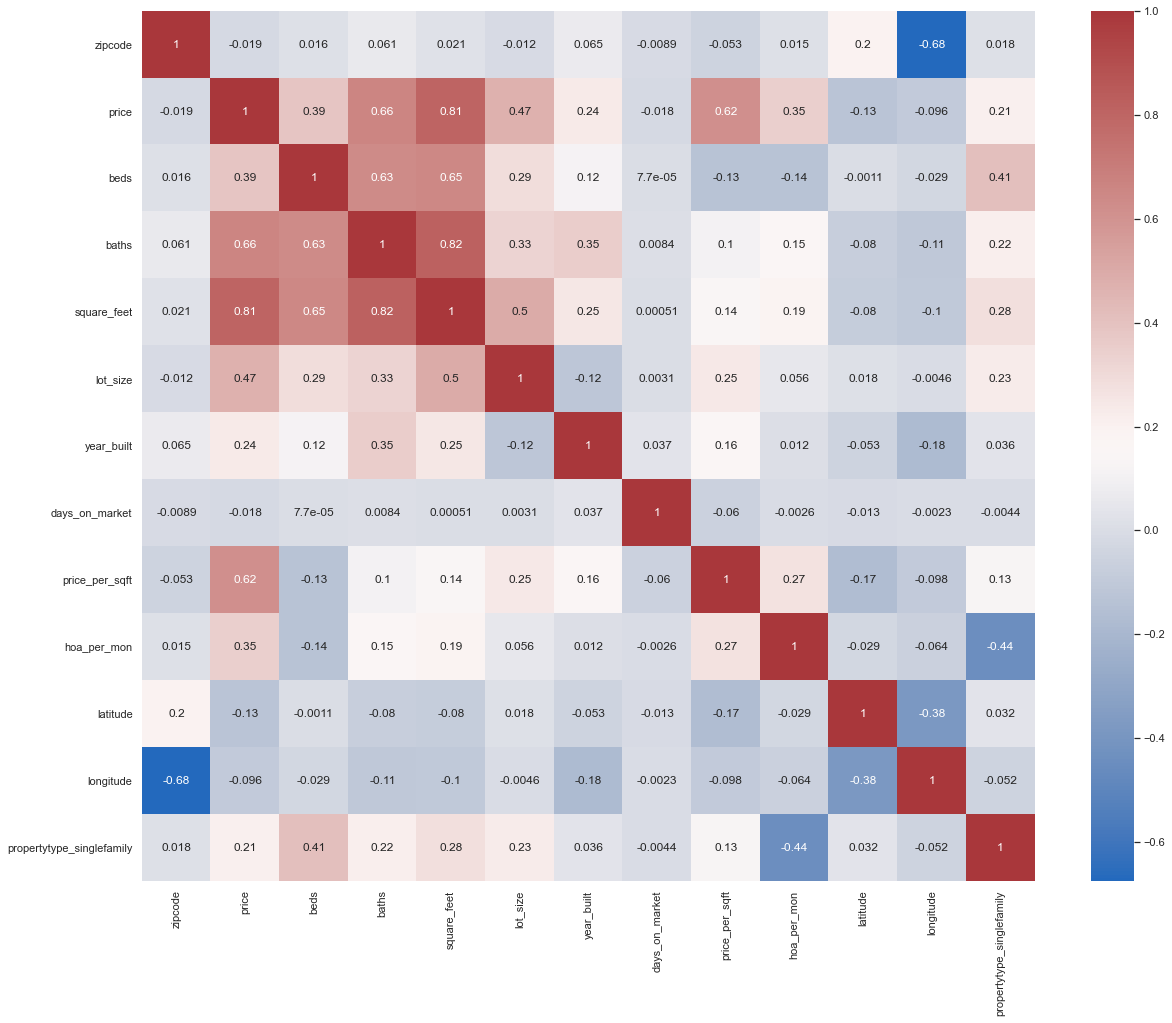

In [12]:
# making a heatmap of the data
plt.subplots(figsize=(20,16))
sns.heatmap(df_clean.corr(), annot=True, cmap='vlag')
plt.show()

 A few insights from the above matrix:
 * price and square_feet are highly correlated
 * square_feet and baths are also highly correlated, which isn't that surprising
 * I am surprised that the number of bedrooms and price aren't more highly correlated

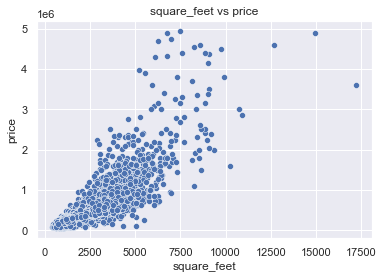

In [13]:
# plot square_feet against price
sns.scatterplot(x='square_feet', y='price', data=df_clean)
plt.title('square_feet vs price')
plt.show()

<AxesSubplot:xlabel='price'>

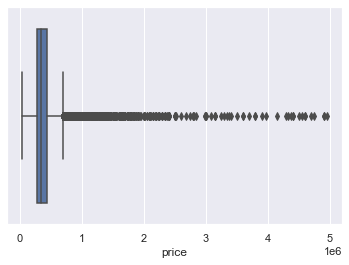

In [14]:
sns.boxplot(x='price', data=df_clean)

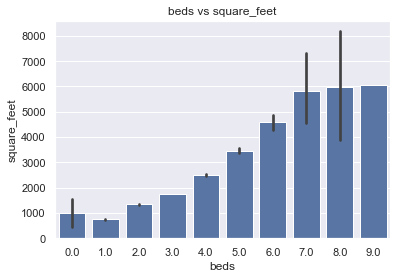

In [15]:
# plot beds against square_feet
sns.barplot(x='beds', y='square_feet', data=df_clean, color='b')
plt.title('beds vs square_feet')
plt.show()

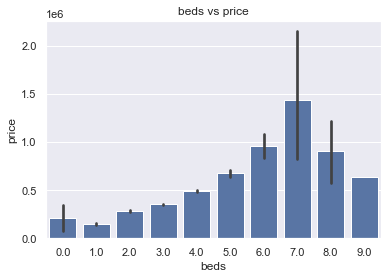

In [16]:
# plot beds against price
sns.barplot(x='beds', y='price', data=df_clean, color='b')
plt.title('beds vs price')
plt.show()

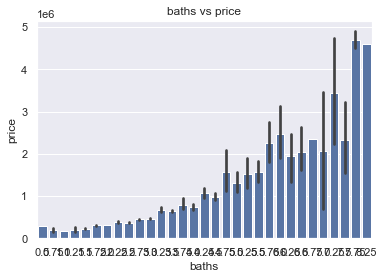

In [17]:
# plot baths against square_feet
sns.barplot(x='baths', y='price', data=df_clean, color='b')
plt.title('baths vs price')
plt.show()

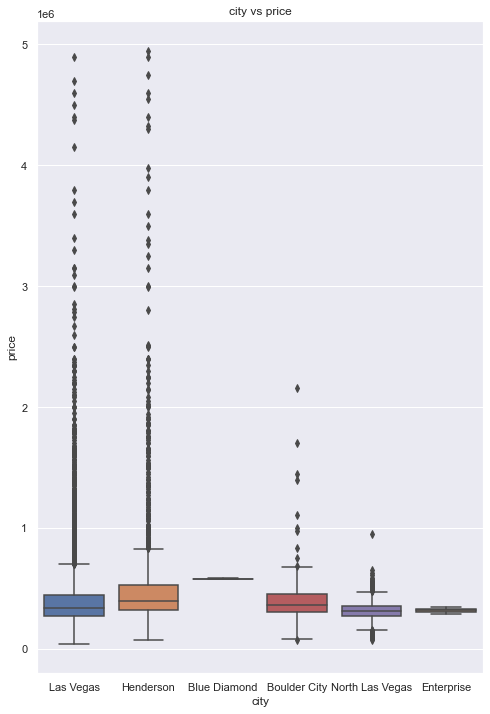

In [18]:
#boxplot of city vs price
plt.subplots(figsize=(8,12))
sns.boxplot(x='city', y='price', data=df_clean)
plt.title('city vs price')
plt.show()

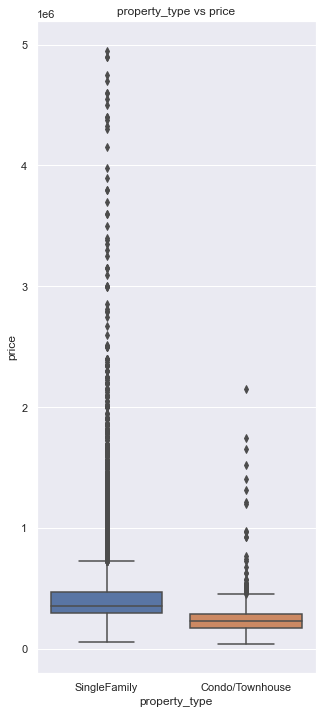

In [19]:
#boxplot of property_type vs price
plt.subplots(figsize=(5,12))
sns.boxplot(x='property_type', y='price', data=df_clean)
plt.title('property_type vs price')
plt.show()

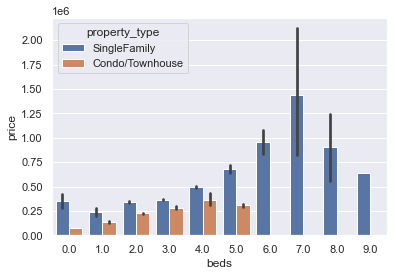

In [20]:
sns.barplot(x='beds', y='price', hue='property_type', data=df_clean)
plt.show()

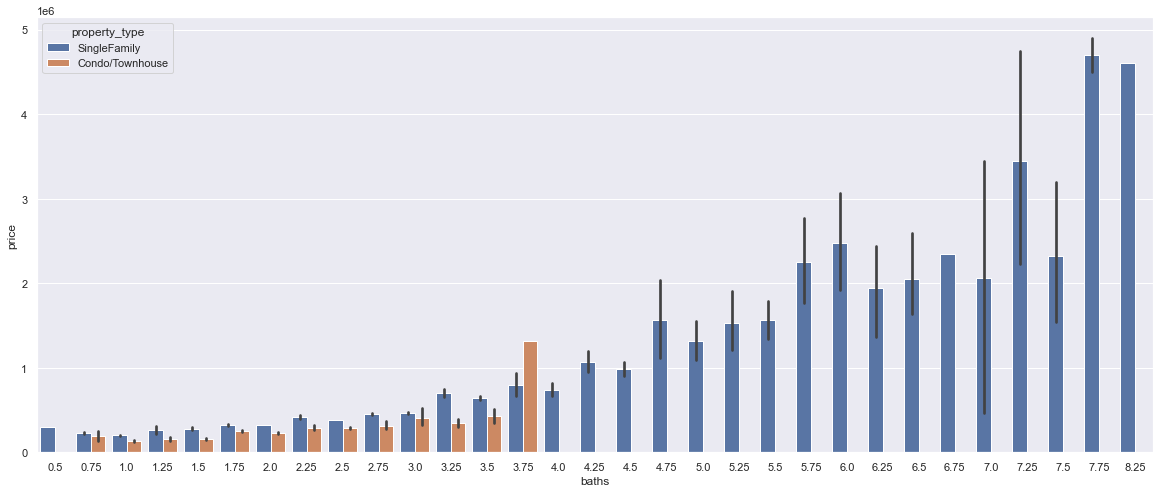

In [21]:
plt.subplots(figsize=(20,8))
sns.barplot(x='baths', y='price', hue='property_type', data=df_clean)
plt.show()

Its interesting that the only case in which a Condo/Townhouse has a higher price than a SingleFamily home is when it has 3.75 bathrooms. Its possible that this could be a result of the location of the 3.75 bathroom condo/townhouse(s). 

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11593 entries, 0 to 157
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   address                    11593 non-null  object 
 1   city                       11593 non-null  object 
 2   zipcode                    11593 non-null  int64  
 3   price                      11593 non-null  int64  
 4   beds                       11593 non-null  float64
 5   baths                      11593 non-null  float64
 6   square_feet                11593 non-null  float64
 7   lot_size                   11593 non-null  float64
 8   year_built                 11593 non-null  float64
 9   days_on_market             11593 non-null  float64
 10  price_per_sqft             11593 non-null  float64
 11  hoa_per_mon                11593 non-null  float64
 12  latitude                   11593 non-null  float64
 13  longitude                  11593 non-null  float

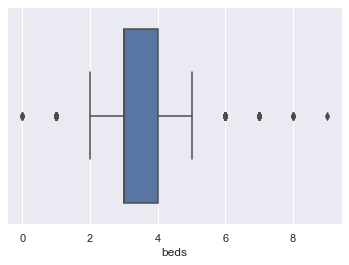

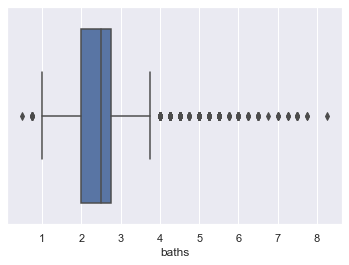

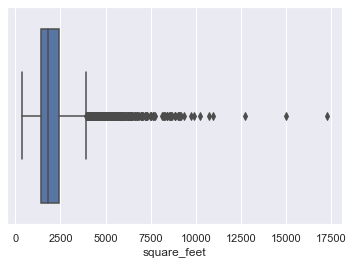

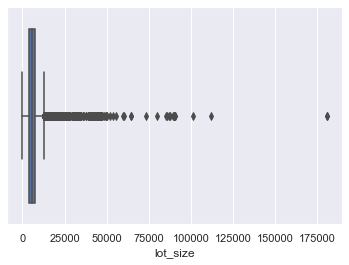

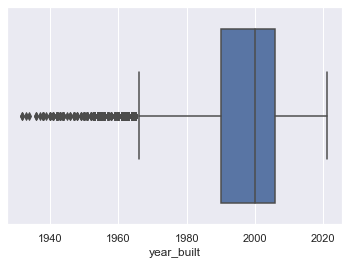

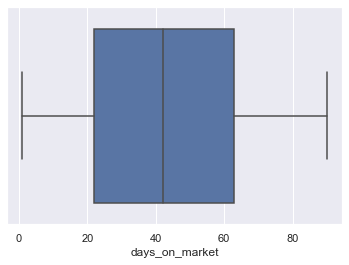

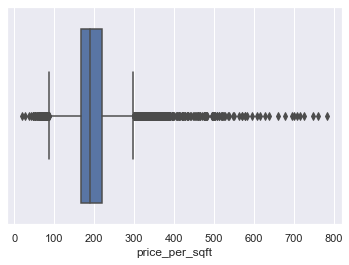

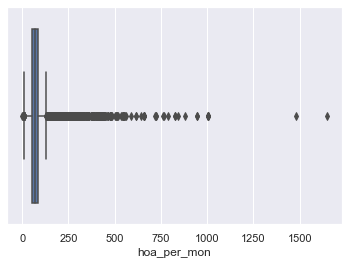

In [23]:
columns = ['beds', 'baths', 'square_feet', 'lot_size', 'year_built', 'days_on_market', 'price_per_sqft', 'hoa_per_mon']
for col in columns:
    sns.boxplot(x=col, data=df_clean)
    plt.show()

In [24]:
# I'm going to take a closer look at the lot_size outlier

df_clean[df_clean['lot_size'] > 150000]

,address,city,zipcode,price,beds,baths,square_feet,lot_size,year_built,days_on_market,price_per_sqft,hoa_per_mon,latitude,longitude,property_type,propertytype_singlefamily
126,5190 N Commerce St,North Las Vegas,89031,950000,4.0,2.0,1836.0,180774.0,1981.0,33.0,517.0,67.0,36.253324,-115.143370,SingleFamily,1
53,13040 Horse Dr,Las Vegas,89166,798000,4.0,2.5,2364.0,180774.0,1996.0,84.0,338.0,67.0,36.314960,-115.384042,SingleFamily,1


In [25]:
# after further research, I see that 5190 N Commerce St is vacant land, it is just mislabeled. I'm deleting this record from df
df_clean = df_clean.drop(labels=126, axis=0)
df_clean[df_clean['lot_size'] > 150000]

,address,city,zipcode,price,beds,baths,square_feet,lot_size,year_built,days_on_market,price_per_sqft,hoa_per_mon,latitude,longitude,property_type,propertytype_singlefamily
53,13040 Horse Dr,Las Vegas,89166,798000,4.0,2.5,2364.0,180774.0,1996.0,84.0,338.0,67.0,36.31496,-115.384042,SingleFamily,1


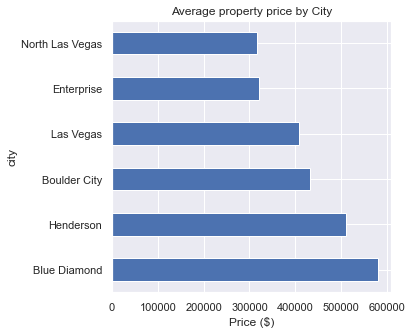

In [26]:
# Exploring city vs. price
city_price_means = df_clean.groupby(by='city')['price'].mean()
city_price_means.sort_values(ascending=False).plot(kind='barh', figsize=(5,5), title='Average property price by City')
plt.xlabel('Price ($)')
plt.show()

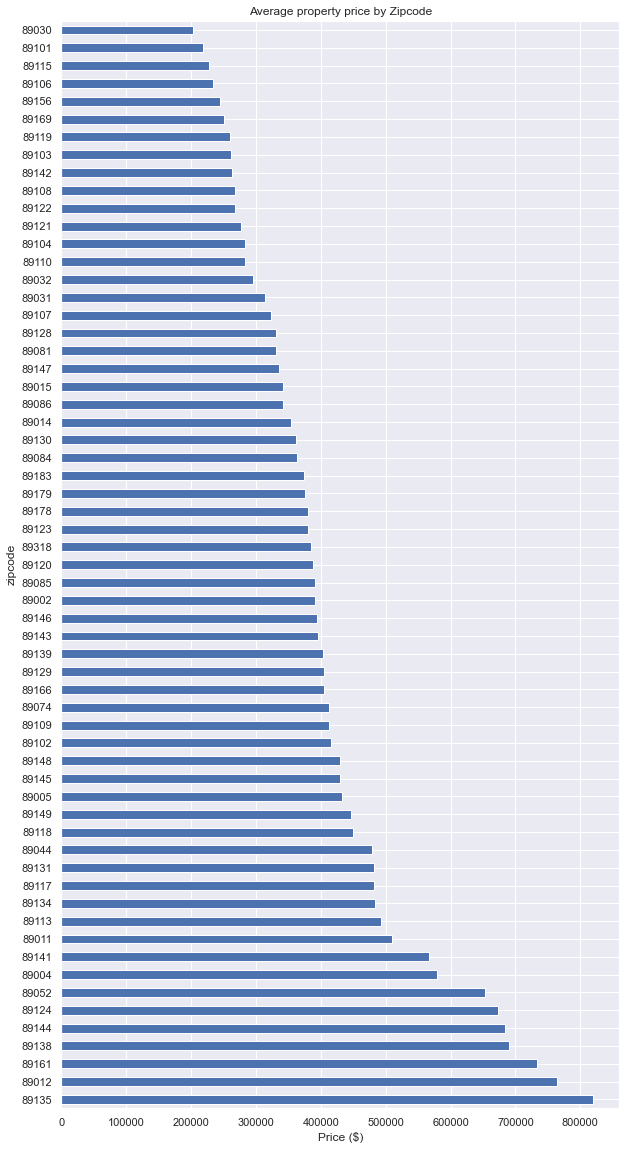

In [27]:
# Exploring zipcode vs. price
zipcode_price_means = df_clean.groupby(by='zipcode')['price'].mean()
zipcode_price_means.head()
zipcode_price_means.sort_values(ascending=False).plot(kind='barh', figsize=(10,20), title='Average property price by Zipcode')
plt.xlabel('Price ($)')
plt.show()

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11547 entries, 0 to 157
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   address                    11547 non-null  object 
 1   city                       11547 non-null  object 
 2   zipcode                    11547 non-null  int64  
 3   price                      11547 non-null  int64  
 4   beds                       11547 non-null  float64
 5   baths                      11547 non-null  float64
 6   square_feet                11547 non-null  float64
 7   lot_size                   11547 non-null  float64
 8   year_built                 11547 non-null  float64
 9   days_on_market             11547 non-null  float64
 10  price_per_sqft             11547 non-null  float64
 11  hoa_per_mon                11547 non-null  float64
 12  latitude                   11547 non-null  float64
 13  longitude                  11547 non-null  float

In [29]:
#saving the final dataset to a new csv file in the '../data/interim' subfolder
df_clean.to_csv('../data/interim/redfin_data_to_process.csv')